<a href="https://colab.research.google.com/github/Lotfullah21/Machine-Learning/blob/main/Support_Vector_Machines(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The Support Vector Machine(SVM):
it is an extension of the support vector classifier that results from enlarging the feature space in a specific way using kernels.
The SVM algorithm outputs an optimal Hyperplane that categorizes new examples.
## Kerneling:
Mapping data to a higher dimensional space is known as kernenling, we have different functions to do this, but the most important ones are
* Linear 
* Polynomial 
* Radial based funcions(RBF)
* Sigmoid

### Why Kerneling: 
most often our real data are not linearly seperable, kernels used here to extned there feature vector to higher dimensional space so that they can be classified.

in SVM the goal is to maximize the margin between from the HyperPlane
#### Hyperplane: 
it divides our data into two classes, on which is greater than zero to the right side of the hyper plane and the next class to the left side of the hyperplane:
#### Margin:
Margin is the distance from Hyperplane to the closest data point.
#### Support Vectors: 
these are the ones that define the shape,or position of the hyper plane. we have to be very careful while choosing, slightest change can cause a huge change in our hyperplane.
#### Why SVMs:
in fact perceptron and SVMs are doing the same thing, but with one difference:
in perceptrons, we have many classes of hyperplanes, But in Support vector machine we also have many, but the algorithm returns the one that has maximum margin, so that it won't be prune much to overfitting. 

SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable. A separator between the categories is found, then the data is transformed in such a way that the separator could be drawn as a hyperplane. Following this, characteristics of new data can be used to predict the group to which a new record should belong.
"IBM course"


## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import scipy.optimize as opt


## Loading the Cancer Data


The example is based on a dataset that is publicly available from the UCI Machine Learning Repository (Asuncion and Newman, 2007)[http://mlearn.ics.uci.edu/MLRepository.html]. The dataset consists of several hundred human cell sample records, each of which contains the values of a set of cell characteristics. The fields in each record are:

| Field name  | Description                 |
| ----------- | --------------------------- |
| ID          | Clump thickness             |
| Clump       | Clump thickness             |
| UnifSize    | Uniformity of cell size     |
| UnifShape   | Uniformity of cell shape    |
| MargAdh     | Marginal adhesion           |
| SingEpiSize | Single epithelial cell size |
| BareNuc     | Bare nuclei                 |
| BlandChrom  | Bland chromatin             |
| NormNucl    | Normal nucleoli             |
| Mit         | Mitoses                     |
| Class       | Benign or malignant         |
<br>
<br>

In [ ]:
!wget -O cell_samples.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv

--2022-06-03 09:42:46--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19975 (20K) [text/csv]
Saving to: ‘cell_samples.csv’

cell_samples.csv    100%[===================>]  19.51K  --.-KB/s    in 0s      

2022-06-03 09:42:46 (211 MB/s) - ‘cell_samples.csv’ saved [19975/19975]



In [ ]:
df = pd.read_csv("cell_samples.csv")
df.head()


,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
cell = df[39:49]
cell

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
39,1091262,2,5,3,3,6,7,7,5,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
41,1099510,10,4,3,1,3,3,6,5,2,4
42,1100524,6,10,10,2,8,10,7,3,3,4
43,1102573,5,6,5,6,10,1,3,1,1,4
44,1103608,10,10,10,4,8,1,8,10,1,4
45,1103722,1,1,1,1,2,1,2,1,2,2
46,1105257,3,7,7,4,4,9,4,8,1,4
47,1105524,1,1,1,1,2,1,2,1,1,2
48,1106095,4,1,1,3,2,1,3,1,1,2


Now, our task here is to extract the pattern from data and divide them into two classes.
each column represents a feature of a cell which contributes to being in Bengin class or in Malignant class.


the data is divided into two classes based on the cells characterastic, 
* Bengin(Value = 2), this means its not dangerous 
* Malignant (value =4), it is dangerous and causes cancer


Here, we will look and plot different features belonging two classes to find the one which has more weights in deciding to which category it mights belong to.


| Field name  | Description                 |
| ----------- | --------------------------- |
| ID          | Clump thickness             |
| Clump       | Clump thickness             |
| UnifSize    | Uniformity of cell size     |
| UnifShape   | Uniformity of cell shape    |
| MargAdh     | Marginal adhesion           |
| SingEpiSize | Single epithelial cell size |
| BareNuc     | Bare nuclei                 |
| BlandChrom  | Bland chromatin             |
| NormNucl    | Normal nucleoli             |
| Mit         | Mitoses                     |
| Class       | Benign or malignant         |
<br>
<br>

### Now Lets do the Scatter plot for each feature vector, to look if we can interpret any insight and look at their relationship to the both of the classes.

	Marginal adhesion vs Single epithelial cell size

## **Marginal adhesion vs Single epithelial cell size**


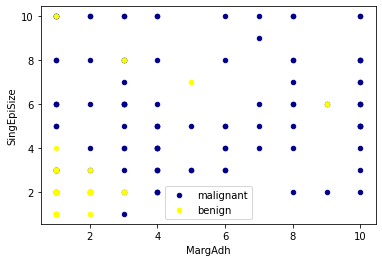

In [25]:
ax = df[df['Class'] == 4][0:100].plot(kind='scatter', x='MargAdh', y='SingEpiSize', color='DarkBlue', label='malignant');
df[df['Class'] == 2][0:100].plot(kind='scatter', x='MargAdh', y='SingEpiSize', color='Yellow', label='benign', ax=ax);
plt.show()

in Bottom left of the above graph there is nmore chance of being in Benign category and the other region we can see more of Malignant class.
we can estimate that as MargAdh and Single epithelial cell size increases the, they are most likely to be in Malignant class.

	
## **Clump thickness vs	Uniformity of cell size**

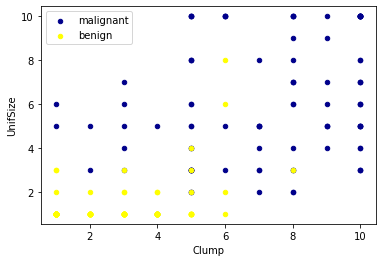

In [26]:
ax = df[df['Class'] == 4][0:100].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
df[df['Class'] == 2][0:100].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.show()

## **Mitoses vs Uniformity of cell size**

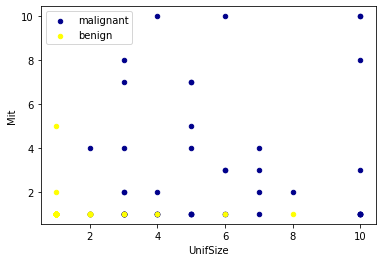

In [19]:

ax = df[df['Class'] == 4][0:50].plot(kind='scatter', x='UnifSize', y='Mit', color='DarkBlue', label='malignant');
df[df['Class'] == 2][0:50].plot(kind='scatter',x='UnifSize', y='Mit', color='Yellow', label='benign', ax=ax);
plt.show()

from above scatter plot we can see a strong relation ship between the two features as Mitosis and Uniformity of Cell Size increases, there is more chance of falling in the Malignant category, but mitosis does not look contribute much here

## **Bland chromatin vs Bare nuclei**

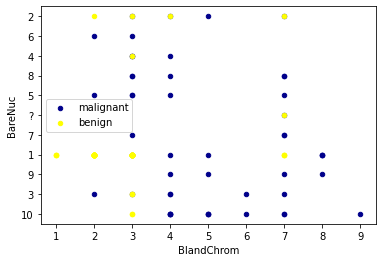

In [24]:
ax = df[df['Class'] == 4][0:50].plot(kind='scatter', x='BlandChrom', y='BareNuc', color='DarkBlue', label='malignant');
df[df['Class'] == 2][0:50].plot(kind='scatter',x='BlandChrom', y='BareNuc', color='Yellow', label='benign', ax=ax);
plt.show()

from above scatter plot, we can see raltively as the BlandChrom increases, the chances of falling in Malignant category also increases, but here is not a strong relation ship between these two features, and also as we can see they are linearly seperable unless we go for higher dimensional feature transformation.

## Note
the above scatter plots shows that none of the above figures is linearly seperable unless we do the feature transformation.
this is one of the main advantage of SVM which it guarantees that if data is seperable, it will return the one with maximum margin.

# Data PreProcessing

In [27]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

from above trable we can see that the BareNuc contains some non_numeric value. in the above also we could see in row 40, there was a non numeircal value.
Lets drop those row which contain non_numerical values

In [30]:
df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int')
df.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

Now,every thing is cleaned up

In [29]:
df.describe()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BlandChrom,NormNucl,Mit,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


### Lets change our feature data to their numeric values and assign it to X as later we will use it for training purpose

In [31]:
feature_df = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)
X[0:10]


array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1],
       [ 8, 10, 10,  8,  7, 10,  9,  7,  1],
       [ 1,  1,  1,  1,  2, 10,  3,  1,  1],
       [ 2,  1,  2,  1,  2,  1,  3,  1,  1],
       [ 2,  1,  1,  1,  2,  1,  1,  1,  5],
       [ 4,  2,  1,  1,  2,  1,  2,  1,  1]])

### Now, coming to our dependent varible, it can take only two values, either(==2, Belongs to the Bengin), or (==4, belongs to Malignant)

In [38]:
dep_feature = df['Class']
Y = np.asarray(dep_feature)
Y[0:10]

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2])

# Train_Test Splitting:
Now, it is time for splitting our data into two sets, for training the model and the other for testing of our model.
sklearn do this for Us by using the train_test_split method which takes as input both the independent features and dependent varible, we can also decide how much percentage of our data we want to be used for testing, here we can see by assigning to 0.2, it means 20 percent of our data will be used for testing (Untouchable during training process).



In [43]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


(546,9) means that we have 546 rows and 9 columns, which states that there is 546 set of data with 9 features (learnable) for training, which our model extracts patterns from these features to decide to which class they belongs to.